In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('module_5_auto.csv')
df.head()

,Unnamed: 0.1,Unnamed: 0,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,0,0,3,122,alfa-romero,std,two,convertible,rwd,front,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,1,1,3,122,alfa-romero,std,two,convertible,rwd,front,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,2,2,1,122,alfa-romero,std,two,hatchback,rwd,front,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,3,3,2,164,audi,std,four,sedan,fwd,front,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,4,4,2,164,audi,std,four,sedan,4wd,front,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


In [3]:
from ipywidgets import interact, interactive, fixed, interact_manual

In [56]:
def DistributionPlot(RedFunction, BlueFunction, RedName, BlueName, Title):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))

    ax1 = sns.distplot(RedFunction, hist=False, color="r", label=RedName)
    ax2 = sns.distplot(BlueFunction, hist=False, color="b", label=BlueName, ax=ax1)
    
    plt.title(Title)
    plt.xlabel('Price (in dollars)')
    plt.ylabel('Proportion of Cars')

    plt.show()
    plt.close()

In [5]:
def PollyPlot(xtrain, xtest, y_train, y_test, lr,poly_transform):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))
    
    
    #training data 
    #testing data 
    # lr:  linear regression object 
    #poly_transform:  polynomial transformation object 
 
    xmax=max([xtrain.values.max(), xtest.values.max()])

    xmin=min([xtrain.values.min(), xtest.values.min()])

    x=np.arange(xmin, xmax, 0.1)


    plt.plot(xtrain, y_train, 'ro', label='Training Data')
    plt.plot(xtest, y_test, 'go', label='Test Data')
    plt.plot(x, lr.predict(poly_transform.fit_transform(x.reshape(-1, 1))), label='Predicted Function')
    plt.ylim([-10000, 60000])
    plt.ylabel('Price')
    plt.legend()

In [7]:
y_data = df['price']
x_data = df.drop('price',axis=1)

Splitting dependent and independent variables

In [8]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.1, random_state=1)

print("number of test samples :", x_test.shape[0])
print("number of training samples:",x_train.shape[0])

number of test samples : 21
number of training samples: 180


In [9]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(x_data, y_data, test_size=0.4, random_state=0)

In [10]:
from sklearn.linear_model import LinearRegression

In [11]:
lm = LinearRegression()

In [13]:
lm.fit(x_train[['horsepower']],y_train)

LinearRegression()

In [14]:
lm.coef_

array([172.82141872])

In [15]:
lm.intercept_

-4582.08331276476

Regression equation: y = -4582 + 172 * x_train['horsepower']

In [20]:
lm.score(x_train[['horsepower']], y_train)

0.6619724197515104

The model trained with horsepower as the independent variable has an r^2 value of 0.66

In [22]:
lm.score(x_test[['horsepower']], y_test)

0.36358755750788263

An r^2 of 0.363 obtained for the test data

In [26]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(x_data, y_data, random_state=0, test_size=0.4)
lm.fit(x_train1[['horsepower']], y_train1)
lm.score(x_train1[['horsepower']],y_train1)

0.5754067463583004

Higher r^2 value obtained for the data set trained with more values

Cross validation allows the data to be seperated into multiple sections or 'folds', data will be trained by a certain number of folds, and tested with the remaining folds

In [27]:
from sklearn.model_selection import cross_val_score

In [37]:
rcross = cross_val_score(lm,x_train[['horsepower']],y_train,cv=4)

In [38]:
rcross.mean()

0.65381242843476

In [33]:
rcross.std()

0.2911839444756029

In [35]:
rcross2 = cross_val_score(lm, x_data[['horsepower']],y_data, cv=2)
rcross2.mean()

0.5166761697127429

In [36]:
from sklearn.model_selection import cross_val_predict

In [40]:
cross_val_predict(lm, x_train[['horsepower']], y_train, cv=4)[0:4]

array([ 7439.55895787, 26519.24136677, 11698.41663843,  5736.01588565])

[14141.63807508 14141.63807508 20814.29423473 12745.03562306
 14762.35027598]
[36655.26601235  9199.61294345 14080.61793347 11182.52122064
 14995.8063691 ]


Overfitting, under fitting and model selection

In [42]:
lr = LinearRegression()
lr.fit(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_train)

LinearRegression()

In [50]:
yhat_train = lr.predict(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])
yhat_train[0:5]

array([ 7426.6731551 , 28323.75090803, 14213.38819709,  4052.34146983,
       34500.19124244])

In [58]:
yhat_test = lr.predict(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])
yhat_test[0:5]

array([11349.35089149,  5884.11059106, 11208.6928275 ,  6641.07786278,
       15565.79920282])

Prediction for the training data and test data are notably different

/Users/neil.bennett876/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/neil.bennett876/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


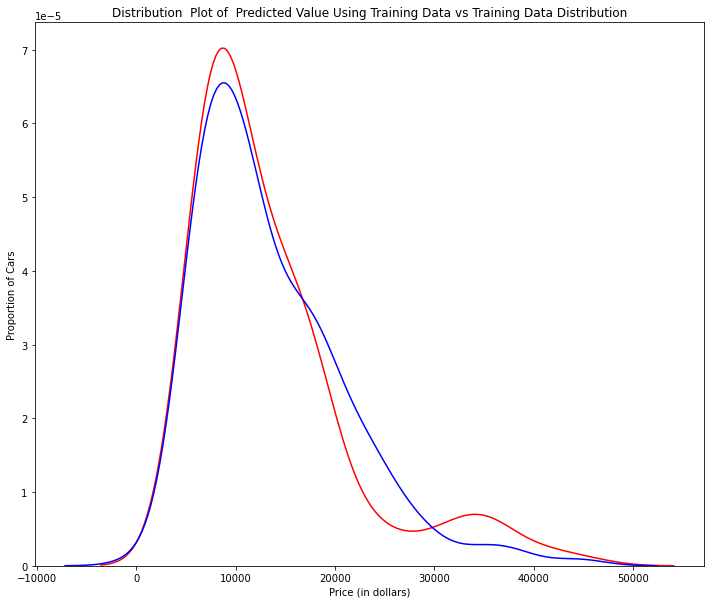

In [57]:
Title = 'Distribution  Plot of  Predicted Value Using Training Data vs Training Data Distribution'
DistributionPlot(y_train, yhat_train, "Actual Values (Train)", "Predicted Values (Train)", Title)

/Users/neil.bennett876/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/neil.bennett876/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


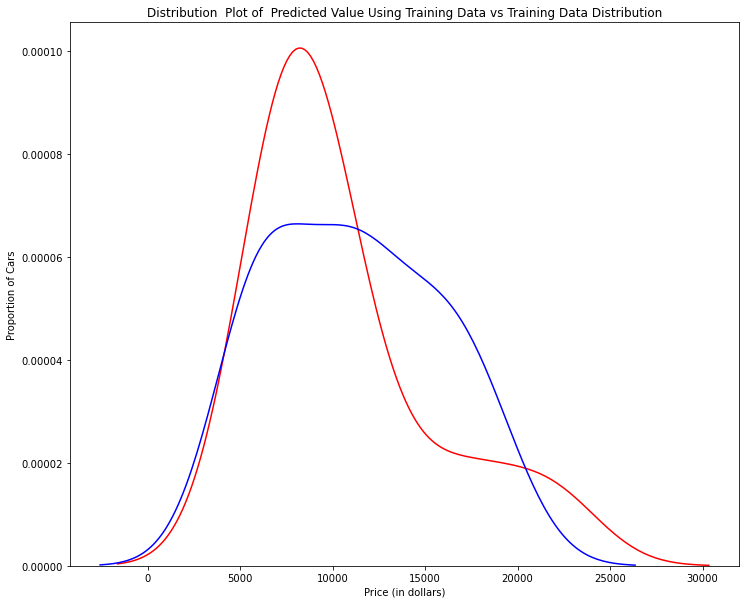

In [60]:
Title = 'Distribution  Plot of  Predicted Value Using Training Data vs Training Data Distribution'
DistributionPlot(y_test, yhat_test, "Actual Values (Train)", "Predicted Values (Train)", Title)

Polynomial regression

In [61]:
from sklearn.preprocessing import PolynomialFeatures

In [62]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=.45, random_state=0)

The fit transform fits the original data into multi-variable polynomial format

In [70]:
pr = PolynomialFeatures(degree=5)
x_train_pr = pr.fit_transform(x_train[['horsepower']])
x_test_pr = pr.fit_transform(x_test[['horsepower']])
pr

PolynomialFeatures(degree=5)

In [71]:
poly = LinearRegression()
poly.fit(x_train_pr, y_train)

LinearRegression()

In [73]:
yhat = poly.predict(x_test_pr)
yhat[0:5]

array([ 6728.6365636 ,  7307.96943803, 12213.77685595, 18893.28708203,
       19995.99386076])

In [75]:
print("Predicted values", yhat[0:5])
print("Actual values", y_test[0:5].values)

Predicted values [ 6728.6365636   7307.96943803 12213.77685595 18893.28708203
 19995.99386076]
Actual values [ 6295. 10698. 13860. 13499. 15750.]


/var/folders/82/3xtnb7x55vn8fnk09l6kq3qm0000gn/T/ipykernel_49375/3046154847.py:2: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  print("Actual values", y_test[0:5].values)


InvalidIndexError: (slice(None, None, None), None)

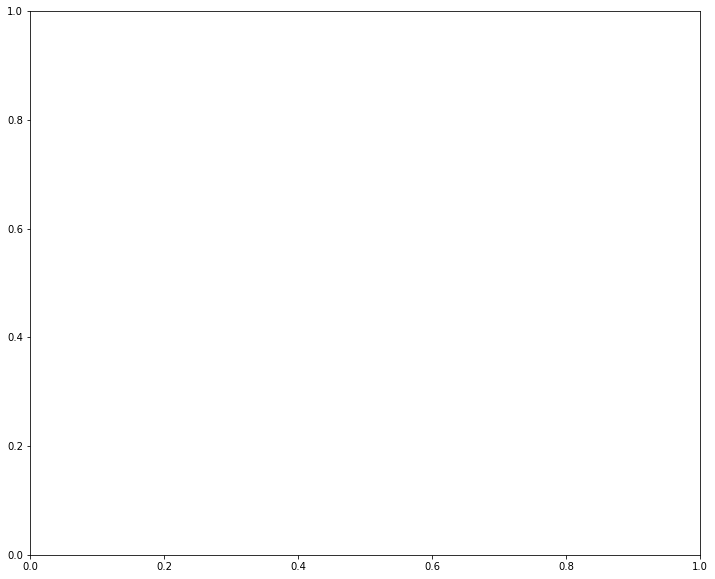

In [76]:
PollyPlot(x_train[['horsepower']], x_test[['horsepower']], y_train, y_test, poly,pr)

In [77]:
print(poly.score(x_train_pr, y_train))
print(poly.score(x_test_pr, y_test))

0.5567716901585238
-29.871297360126263


Large negative value for the r^2 so the amount of degrees of this polynomial is not feasible

In [78]:
rsq_test = []
order = [1,2,3,4,5]

for n in order:
    pr = PolynomialFeatures(degree=n)
    x_train_pr = pr.fit_transform(x_train[['horsepower']])
    x_test_pr = pr.fit_transform(x_test[['horsepower']])

    lr.fit(x_train_pr, y_train)
    rsq_test.append(lr.score(x_test_pr, y_test))
rsq_test

[0.7325101750243117,
 0.74058587106999,
 0.7406204232755499,
 0.4063966416340651,
 -29.871297360126263]

Text(0.5, 1.0, 'How r^2 changes with increasing order for test data')

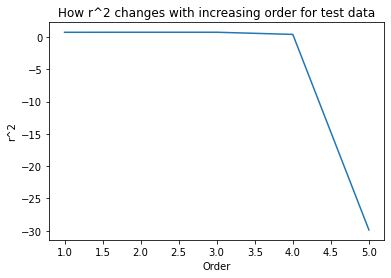

In [81]:
plt.plot(order,rsq_test)
plt.xlabel("Order")
plt.ylabel("r^2")
plt.title("How r^2 changes with increasing order for test data")

In [82]:
pr1 = PolynomialFeatures(degree=2)

In [85]:
transf_train = pr1.fit_transform(x_train[['horsepower','curb-weight','engine-size','highway-mpg']])
transf_test = pr1.fit_transform(x_test[['horsepower','curb-weight','engine-size','highway-mpg']])

In [88]:
print(transf_train.shape)
print(x_test[['horsepower','curb-weight','engine-size','highway-mpg']].shape)
print(transf_test.shape)

(110, 15)
(91, 4)
(91, 15)


In [90]:
poly1 = LinearRegression()
poly1.fit(transf_train,y_train)

LinearRegression()

/Users/neil.bennett876/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/neil.bennett876/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


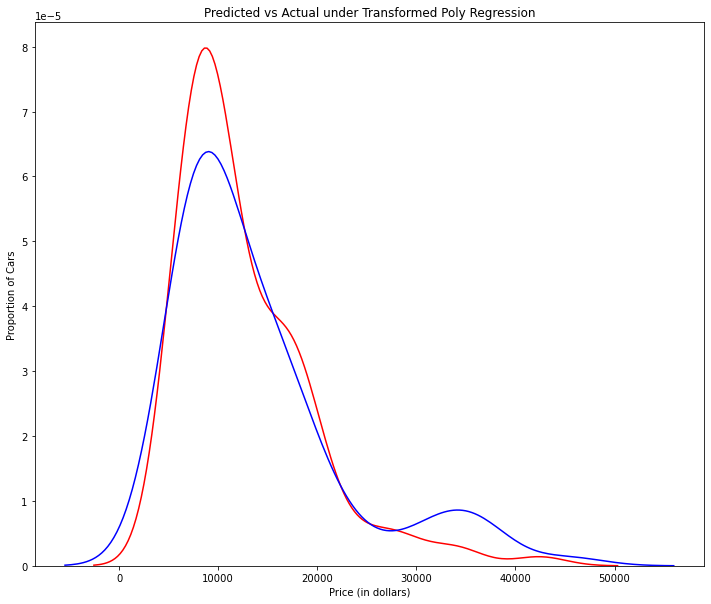

In [93]:
poly_hat = poly1.predict(transf_train)
DistributionPlot(poly_hat, y_test, "Predicted","Actual","Predicted vs Actual under Transformed Poly Regression")

Ridge Regression

In [94]:
pr=PolynomialFeatures(degree=2)
x_train_pr=pr.fit_transform(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg','normalized-losses','symboling']])
x_test_pr=pr.fit_transform(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg','normalized-losses','symboling']])

In [95]:
from sklearn.linear_model import Ridge

In [97]:
RidgeModel = Ridge(alpha=0.1)
RidgeModel

Ridge(alpha=0.1)

Training the model with the current alpha value

In [99]:
RidgeModel.fit(x_train_pr,y_train)

/Users/neil.bennett876/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=1.02972e-16): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


Ridge(alpha=0.1)

In [103]:
yhat = RidgeModel.predict(x_test_pr)

Comparing the predicted values, from the model with the influence of alpha, to the given values

In [106]:
print(yhat[0:5])
print(y_test.iloc[0:5].values)

[ 6567.83081933  9597.97151398 20836.22326844 19347.69543463
 21402.65500379]
[ 6295. 10698. 13860. 13499. 15750.]


In [108]:
from tqdm import tqdm

Rsqu_test = []
Rsqu_train = []
dummy1 = []
Alpha = 10 * np.array(range(0,1000))
pbar = tqdm(Alpha)

for alpha in pbar:
    RigeModel = Ridge(alpha=alpha) 
    RigeModel.fit(x_train_pr, y_train)
    test_score, train_score = RigeModel.score(x_test_pr, y_test), RigeModel.score(x_train_pr, y_train)
    
    pbar.set_postfix({"Test Score": test_score, "Train Score": train_score})

    Rsqu_test.append(test_score)
    Rsqu_train.append(train_score)

100%|██████████| 1000/1000 [00:01<00:00, 672.65it/s, Test Score=0.564, Train Score=0.859]


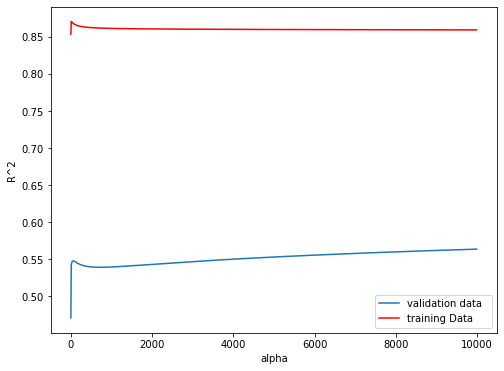

In [110]:
width = 8
height = 6
plt.figure(figsize=(width, height))

plt.plot(Alpha,Rsqu_test, label='validation data  ')
plt.plot(Alpha,Rsqu_train, 'r', label='training Data ')
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.legend()

In [113]:
RidgeModel = Ridge(alpha=10)
RidgeModel.fit(x_train_pr, y_train)
y_hat2 = RidgeModel.score(x_test_pr, y_test)
y_hat2

0.5418576440210762

Grid Search - a method by which to finds the best value for alpha

In [114]:
from sklearn.model_selection import GridSearchCV

Creating a list of parameters

In [115]:
parameters1= [{'alpha': [0.001,0.1,1, 10, 100, 1000, 10000, 100000, 100000]}]
parameters1

[{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000, 100000]}]

In [116]:
RR = Ridge()
RR

Ridge()

Creating a grid search object with the desired parameters

In [117]:
Grid1 = GridSearchCV(RR,parameters1,cv=4)

In [118]:
Grid1.fit(x_data[['horsepower', 'curb-weight','engine-size','highway-mpg']],y_data)

GridSearchCV(cv=4, estimator=Ridge(),
             param_grid=[{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000,
                                    100000]}])

With the combination of parameters, best_estimator is able to determine which alpha value is ideal for this model

In [119]:
BestRR = Grid1.best_estimator_
BestRR

Ridge(alpha=10000)

In [120]:
BestRR.score(x_test[['horsepower', 'curb-weight','engine-size','highway-mpg']], y_test)

0.8411649831036146